# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import os
import datetime

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='Reachers_Windows_x86_64/Reacher.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
state = env_info.vector_observations
state_size = state.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(state.shape[0], state_size))
print('The state for the first agent looks like:', state[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.13199999704957008


### 4. It's Your Turn!

Now it's turn to train an agent to solve the environment!  When training the environment, the training mode need to be set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

# Training of a PPO Agent
We are now ready to train our policy!
WARNING: make sure to turn on GPU, which also enables multicore processing. But let me be frank, to me the training took much less in the cpu than with the GPU. The memory management may be no optimal. 

In [6]:
import torch
from agent_ppo import Agent
from model import Policy

# Agent Hyperparameters selection
episodes = 550
gamma = 0.99
steps = 150                         # Steps for trajectory
epsilon_clip = 0.2
batch_size = int(10*20)
epochs = 10
gradient_clip = 10.0
LR = 1e-4
log_each = 10
beta = 0.01
gae_tau = 0.95
core = [125,125]

Text = 'DNN arq.:\n' + 'Input Layer: ' + str(state_size) + '\n' 
for layer in range(len(core)):
    Text = Text + 'Hidden Layer#' + str(layer + 1) + ': ' + str(core[layer]) + '\n'
Text = Text + 'Output Layer: ' + str(action_size)
print(Text)
print('\n')

# device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device = torch.device('cpu')
print('Running on:', device)

policy = Policy(state_size, action_size, core).to(device)

agent = Agent(
    env,
    policy,
    device,
    nsteps = steps,
    gamma = gamma,
    epochs = epochs,
    nbatchs = batch_size,
    epsilon_clip = epsilon_clip,
    lrate = LR,
    gradient_clip = gradient_clip,
    beta = beta,
    gae_tau = gae_tau
)


DNN arq.:
Input Layer: 33
Hidden Layer#1: 125
Hidden Layer#2: 125
Output Layer: 4


Running on: cpu


### 5. It's Turn of Train the Agent

Now it's your turn to train the agent to solve the environment!  The environment is considered solved when the agents' average scores achieves an avarage score of 30 points over an average of 100 episodes.
While training the agent, you can see the progress in an online trend.

The training follow few main steps (embedded in the `agent_ppo.py`), for each episode.
A complete description is included in the Repor.md of this repository.
The results are collected and showed and if the avarage score passes the 30 points and improve from the previous episodes, the models are checkpointed.
At the end of the training the trend with the progress is saved in the folder `results\`.

<IPython.core.display.Javascript object>


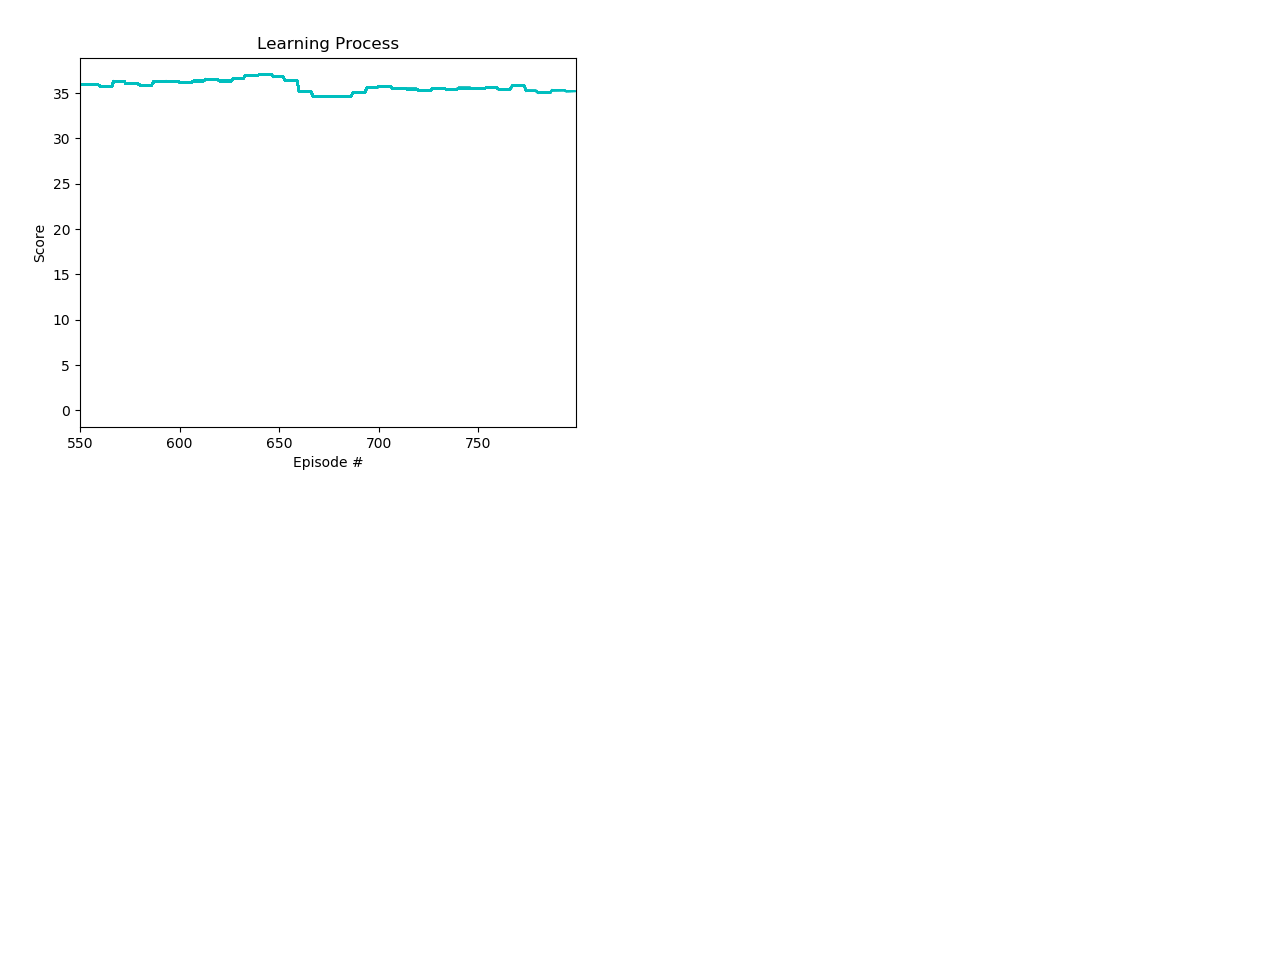

training loop:  45% |###########               | ETA:   1:19:03 | Score:   30.6

Saved at episode:  361


training loop: 100% |##########################| Time:  2:26:39 | Score:   35.2


<IPython.core.display.Javascript object>


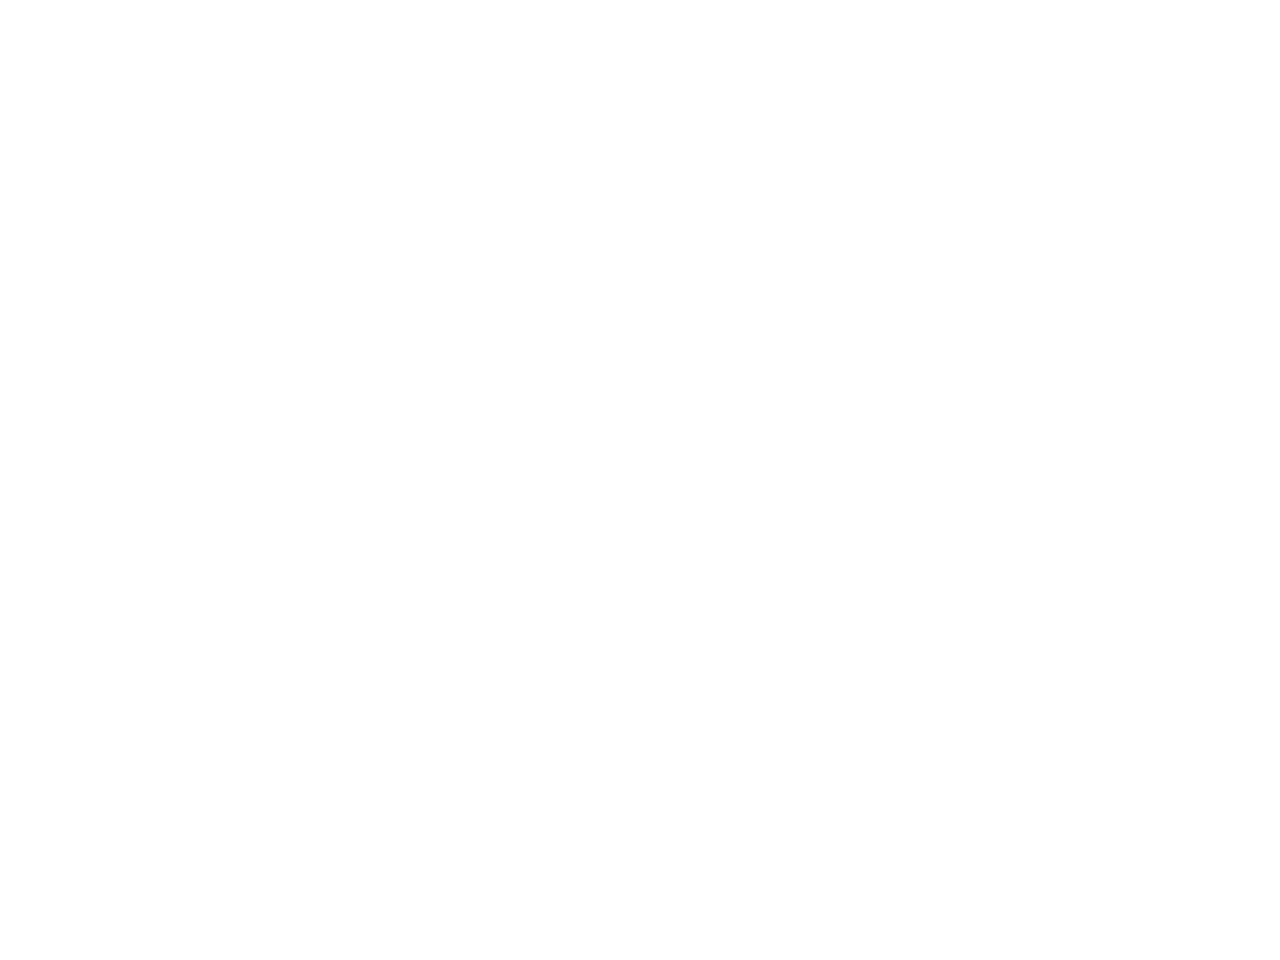

In [7]:
from utilities import Plotting
import progressbar as pb
from collections import namedtuple, deque
%matplotlib notebook

solved = 30.0

rewards = []
last_saved = 0
IsSaved = False
scores = deque(maxlen=100)
PScores = []
mean = 0

 # Environment initialization and initial state
env_info = env.reset(train_mode=True)[brain_name]
state = env_info.vector_observations

# Score Trend Initialization
plot = Plotting(
    title ='Learning Process',
    y_label = 'Score',
    x_label = 'Episode #',
    x_range = 250,
)
plot.show()

# Progress Bar to monitor the training
widget = ['training loop: ', pb.Percentage(), ' ', pb.Bar(), ' ', pb.ETA(), ' | ', pb.DynamicMessage('Score')]
timer = pb.ProgressBar(widgets=widget, maxval=episodes).start()

for episode in range(episodes):
    
    agent.step()
    
    mean = np.sum(agent.scores)/100
    timer.update(episode+1, Score = mean)
    PScores.append(mean)
    plot.Update(list(range(episode+1)),PScores)

    if (mean >= solved and mean > last_saved) or (episode == episodes-1):
        last_saved = mean
        if not IsSaved:
            currentDT = datetime.datetime.now()
            FileName = 'ppo_'+ currentDT.strftime("%Y%m%d%H%M")+'.ckpt'
            agent.save('saved/'+ FileName)
            FirstSaveEpisode = episode+1
            print("Saved at episode: ", FirstSaveEpisode)
            IsSaved = True
        else:
            agent.save('saved/'+ FileName)

timer.finish()

# Save Training Trend
#  Plotting the entire set of training episodes
end_plot = Plotting(
    title ='Learning Process',
    y_label = 'Score',
    x_label = 'Episode #',
    x_values = list(range(episode+1)),
    y_values = PScores
)
end_plot.legend(Text, 2/3*episodes, 1/3*np.max(PScores))

# Create the results directory if missed
dirn = os.path.dirname('results/')
if not os.path.exists(dirn):
    os.mkdir(dirn)

# Save a picture of the Trend
currentDT = datetime.datetime.now()
end_plot.save('results/Training_'+ currentDT.strftime("%Y%m%d%H%M")+'.png')

### 6. See the Agent Performance!

Now that the agent is trained you can see it in action!

If you want to load a different checkpoint, just assign it in the cell below.

In [8]:
FileName = FileName #"ppo_201904201210.ckpt"

In [9]:
# Environment for real time execution

test_agent = Agent(env, policy, device, restore = ('saved/'+ FileName), train = False)

n_episodes = 3
scores = []

After loading the checkpoint few episodes are run.

In [10]:
for episode in range(n_episodes):
        
    test_agent.run()
    scores.append(test_agent.scores)

print('Average score over {0} episodes: {1:.3f}'.format(n_episodes, np.mean(scores)))

Average score on 3 episodes: 36.890


When finished, you can close the environment.

In [11]:
env.close()